# Data Challenge: Videogame Sales

## Goal
You work for a data science consulting company. A major video game production company has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:
1. __What are some major differences between the North American, European, and Japanese video game markets?__
2. __What video game genres are trending in each market?__


## The Data
This dataset contains a list of video games with sales greater than 100,000 copies.
- __Rank__ - Ranking of overall sales
- __Name__ - The games name
- __Platform__ - Platform of the games release (i.e. PC,PS4, etc.)
- __Year__ - Year of the game's release
- __Genre__ - Genre of the game
- __Publisher__ - Publisher of the game
- __NA_Sales__ - Sales in North America (in millions)
- __EU_Sales__ - Sales in Europe (in millions)
- __JP_Sales__ - Sales in Japan (in millions)
- __Other_Sales__ - Sales in the rest of the world (in millions)
- __Global_Sales__ - Total worldwide sales.


## Possible Approaches for questions
1. Look at what genres sell the best in each region. Which years had the highest sales? How has this impacted certain platforms?
2. Look at how genre has changed over time in each market

## Load Data

In [912]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [916]:
vgsales = pd.read_csv("vgsales.csv", index_col=0)

#Condense the strings in the columns to make simpler to write code
colnames = {"NA_Sales": "NA", "EU_Sales": "EU","JP_Sales": "JP","Other_Sales": "Other", "Global_Sales": "Global"}
vgsales = vgsales.rename(columns = colnames)
vgsales.head(10)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [917]:
print(vgsales.shape)
vgsales.describe()

(16598, 10)


,Year,NA,EU,JP,Other,Global
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [918]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
Name         16598 non-null object
Platform     16598 non-null object
Year         16327 non-null float64
Genre        16598 non-null object
Publisher    16540 non-null object
NA           16598 non-null float64
EU           16598 non-null float64
JP           16598 non-null float64
Other        16598 non-null float64
Global       16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [919]:
#Check the percentage of null values
vgsales.isna().mean().round(4) * 100

Name         0.00
Platform     0.00
Year         1.63
Genre        0.00
Publisher    0.35
NA           0.00
EU           0.00
JP           0.00
Other        0.00
Global       0.00
dtype: float64

There are some null values in the Year and Publisher, 1.6% and 0.35% respectively. I will drop these and turn Years into integers

In [920]:
vgsales = vgsales.dropna(axis = 0)
vgsales['Year'] = vgsales['Year'].astype(int)
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
Name         16291 non-null object
Platform     16291 non-null object
Year         16291 non-null int64
Genre        16291 non-null object
Publisher    16291 non-null object
NA           16291 non-null float64
EU           16291 non-null float64
JP           16291 non-null float64
Other        16291 non-null float64
Global       16291 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


# Exploratory Analysis

In [921]:
#determine the Unique values
vgstrings = ['Platform', 'Year', 'Genre', 'Publisher']
for i in vgsales[vgstrings]:
    print(i)
    print(vgsales[i].unique())

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]
Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'E

In [922]:
def most_appear(df, col):
    '''function used to return the frequency of top 10 values in each features'''
    print('The top 10 values in' , col , 'are\n' , (df[col].value_counts(normalize=True).head(10) * 100).round(2))
    print( )

for col in vgstrings:
    most_appear(vgsales, col)

The top 10 values in Platform are
 DS      13.08
PS2     13.06
PS3      8.00
Wii      7.92
X360     7.57
PSP      7.35
PS       7.30
PC       5.76
XB       4.93
GBA      4.82
Name: Platform, dtype: float64

The top 10 values in Year are
 2009    8.78
2008    8.77
2010    7.72
2007    7.37
2011    6.97
2006    6.19
2005    5.75
2002    5.09
2003    4.76
2004    4.57
Name: Year, dtype: float64

The top 10 values in Genre are
 Action          19.96
Sports          14.14
Misc            10.35
Role-Playing     9.02
Shooter          7.87
Adventure        7.82
Racing           7.52
Platform         5.37
Simulation       5.21
Fighting         5.13
Name: Genre, dtype: float64

The top 10 values in Publisher are
 Electronic Arts                 8.22
Activision                      5.93
Namco Bandai Games              5.70
Ubisoft                         5.64
Konami Digital Entertainment    5.05
THQ                             4.37
Nintendo                        4.27
Sony Computer Entertainment 

In [923]:
#Top 10 Publishers (Actual count in millions)
# vgsales.Publisher.value_counts().head(10)
vgsales.Genre.value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [924]:
#What are the total sales in each region in the billions?

regions = ['NA', 'EU', 'JP', 'Other', 'Global']

# print(round(vgsales[regions].sum()/1000, 3))
print((vgsales[regions].sum()/1000).round(3))

NA        4.328
EU        2.407
JP        1.284
Other     0.789
Global    8.812
dtype: float64


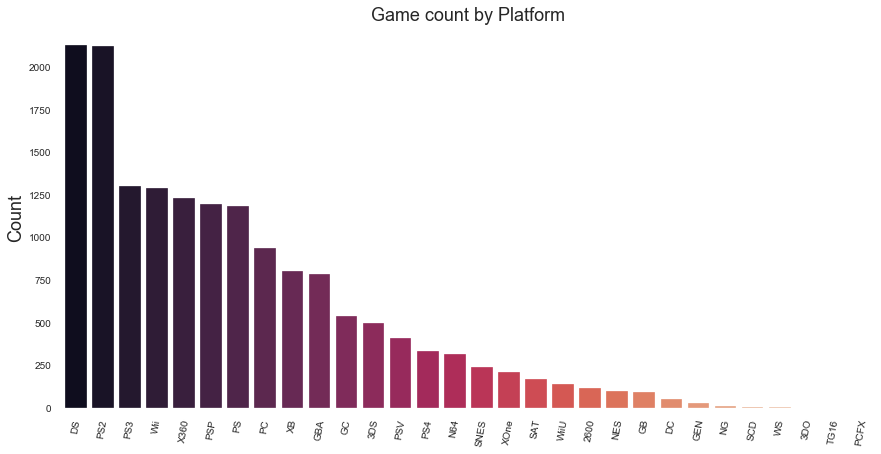

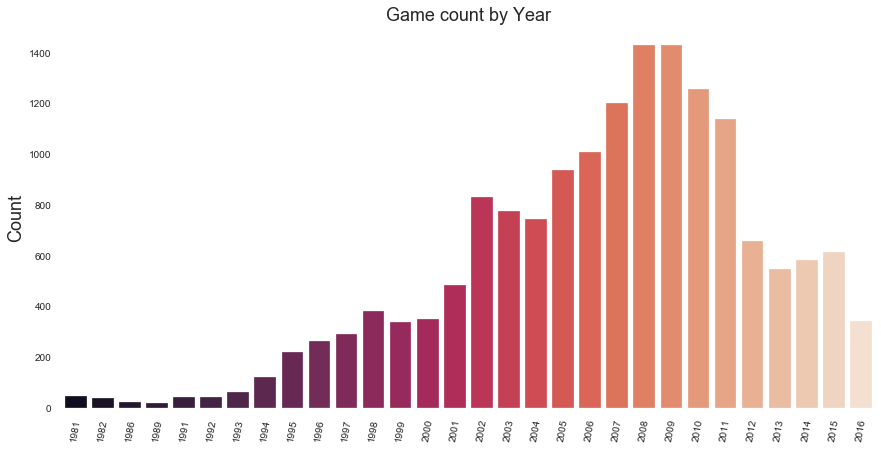

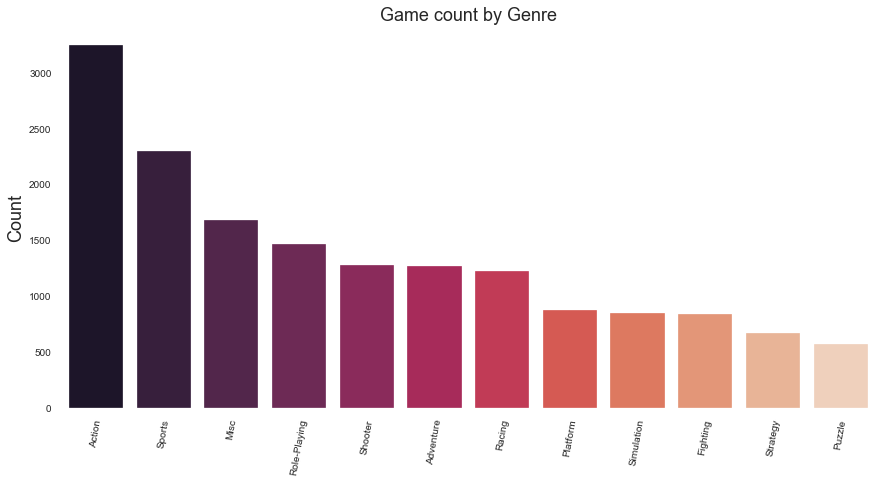

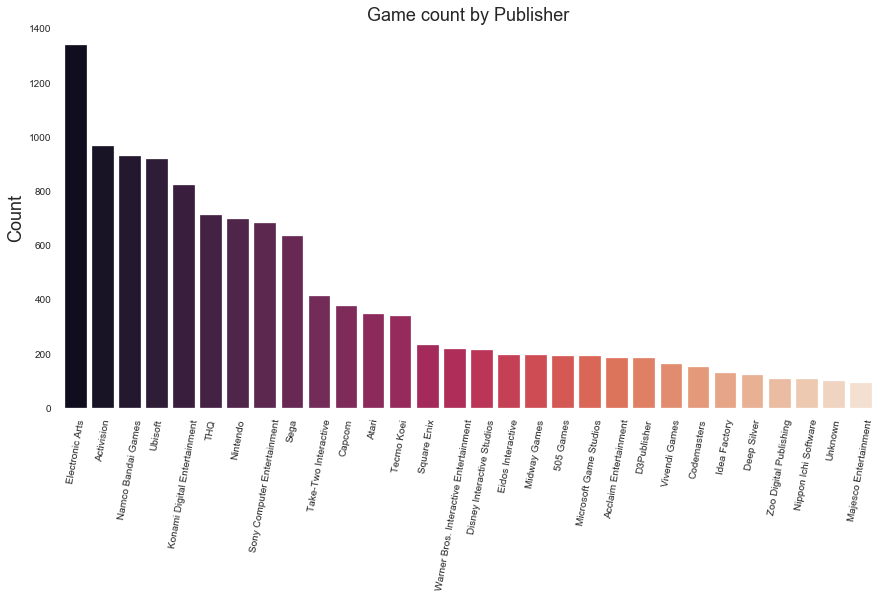

In [925]:
#Create a function that makes graphs of game counts across various columns

def chart_count(df, col):
    chart = vgsales[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12, 6))
    plt.xticks(rotation=80)
    plt.tight_layout()
    sns.barplot(x=col, y='Name', data=chart[:30], palette='rocket').set_title(('Game count by '+col), fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.xlabel('')

for col in vgstrings:
    chart_count(vgsales, col)

# Genres

In [1077]:
vg_genre = vgsales.groupby(['Genre'])
vg_genre.get_group('Sports').head(20)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Manufacturer
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NIN
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NIN
14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,NIN
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,NIN
78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,SONY
86,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.06,NIN
113,FIFA 14,PS3,2013,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,SONY
118,Zumba Fitness,Wii,2010,Sports,505 Games,3.50,2.64,0.00,0.67,6.81,NIN
122,FIFA 12,PS3,2011,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69,SONY


The Nintendo games rank high but these are likely due to accessory pack ins. FIFA does extremely well in Europe, but not elsewhere. Finally on this list, Madden and Tony Hawk series both appear to do well in North America

In [1078]:
vg_genre.get_group('Role-Playing').head(20)

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Manufacturer
Rank,,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN
21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,NIN_H
26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NaN
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,NIN_H
31,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,NIN_H
50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,NIN_H
59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,NaN


In [875]:
vg_genre['Publisher'].value_counts(normalize=True).loc['Action'].head(10)

Publisher
Activision                                0.094740
Namco Bandai Games                        0.075977
THQ                                       0.059366
Ubisoft                                   0.059366
Electronic Arts                           0.055983
Capcom                                    0.047370
Warner Bros. Interactive Entertainment    0.046140
Konami Digital Entertainment              0.043986
Tecmo Koei                                0.042141
Sega                                      0.029529
Name: Publisher, dtype: float64

## Regional differences

__Approach__

1. For each genre, make a graph/dataframe broken up for the 4 regions (US, EU, JP, Other)
2. For each region, see which genre sells most. 

                  NA      EU      JP   Other   Global
Genre                                                
Action        861.77  516.48  158.65  184.92  1722.84
Adventure     101.93   63.74   51.99   16.70   234.59
Fighting      220.74  100.00   87.15   36.19   444.05
Misc          396.92  211.77  106.67   73.92   789.87
Platform      445.99  200.65  130.65   51.51   829.13
Puzzle        122.01   50.52   56.68   12.47   242.21
Racing        356.93  236.31   56.61   76.68   726.76
Role-Playing  326.50  187.57  350.29   59.38   923.83
Shooter       575.16  310.45   38.18  101.90  1026.20
Simulation    181.78  113.02   63.54   31.36   389.98
Sports        670.09  371.34  134.76  132.65  1309.24
Strategy       67.83   44.84   49.10   11.23   173.27


Text(0.5, 1.0, 'Sales per Genre, in millions')

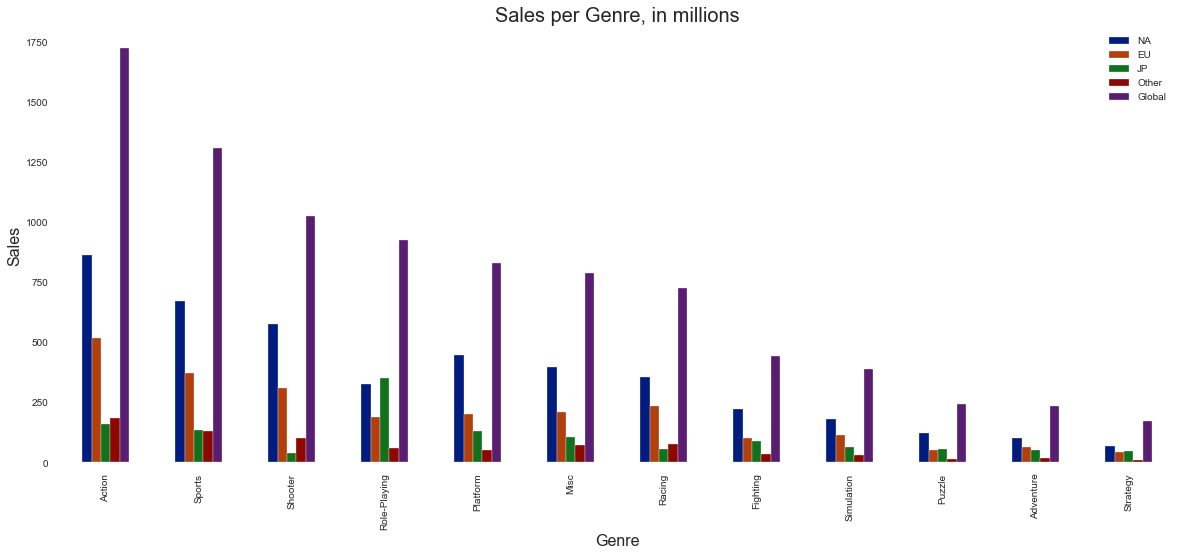

In [464]:
#make quick graph seperating the genres and look at sales per region

df3 = vgsales.groupby(['Genre'])
val = df3['NA','EU','JP','Other', 'Global'].aggregate(np.sum)
print(val)

val = val.sort_values('Global', ascending = False)
val.plot(kind='bar',figsize=(20,8))

# val.sort(columns='Genre', inplace=True)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.title('Sales per Genre, in millions',fontsize=20)

           Genre      NA
0         Action  861.77
1         Sports  670.09
2        Shooter  575.16
3       Platform  445.99
4           Misc  396.92
5         Racing  356.93
6   Role-Playing  326.50
7       Fighting  220.74
8     Simulation  181.78
9         Puzzle  122.01
10     Adventure  101.93
11      Strategy   67.83
 
           Genre      EU
0         Action  516.48
1         Sports  371.34
2        Shooter  310.45
3         Racing  236.31
4           Misc  211.77
5       Platform  200.65
6   Role-Playing  187.57
7     Simulation  113.02
8       Fighting  100.00
9      Adventure   63.74
10        Puzzle   50.52
11      Strategy   44.84
 
           Genre      JP
0   Role-Playing  350.29
1         Action  158.65
2         Sports  134.76
3       Platform  130.65
4           Misc  106.67
5       Fighting   87.15
6     Simulation   63.54
7         Puzzle   56.68
8         Racing   56.61
9      Adventure   51.99
10      Strategy   49.10
11       Shooter   38.18
 
           Genre   

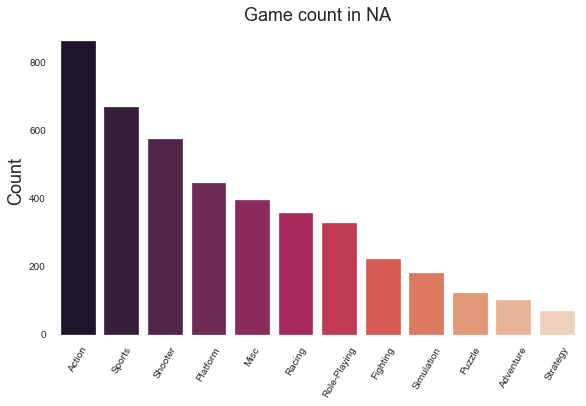

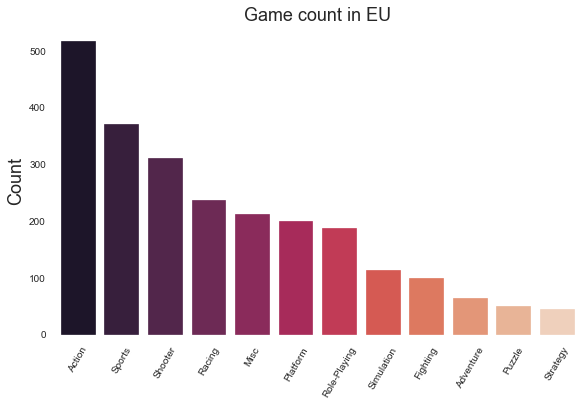

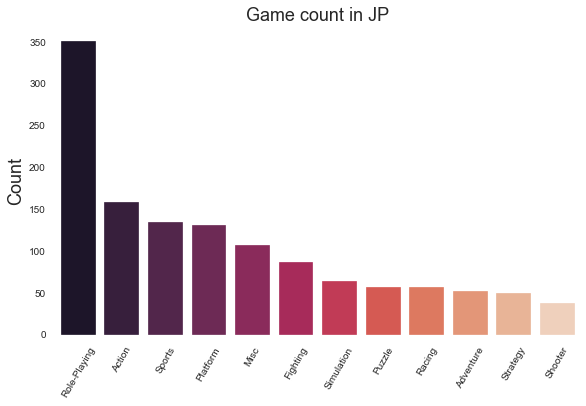

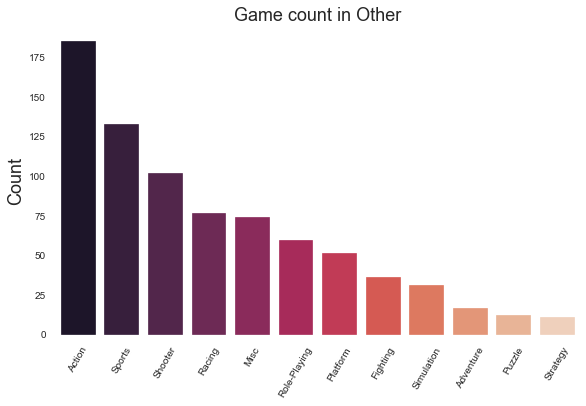

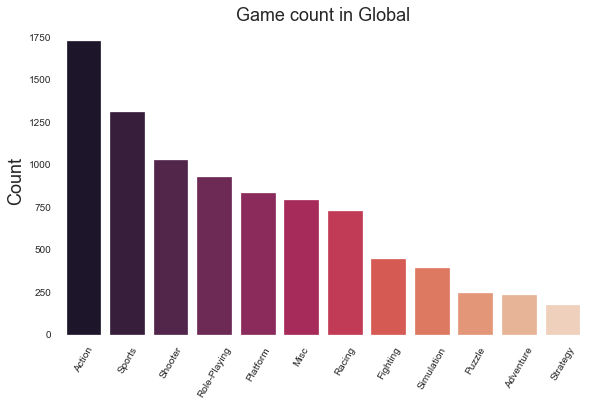

In [529]:
#Create seperate graphs for each region and sort them by genre which sells the most

regions = ['NA','EU','JP','Other', 'Global']

def region_sales(df, col):
    chart = df[['Genre', col]].groupby(['Genre']).sum().sort_values(col, ascending=False).reset_index()
    print(chart)
    print(" ")
    sns.set_style("white")
    plt.figure(figsize=(8, 5))
    plt.xticks(rotation=60)
    plt.tight_layout()
    sns.barplot(y=col, x='Genre', data=chart[:30], palette='rocket').set_title(('Game count in '+col), fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.xlabel('')
    

for col in regions:
    region_sales(vgsales, col)

In [522]:
chart = vgsales[['Genre','NA', 'JP', 'EU', 'Other', 'Global']].groupby(['Genre']).sum().sort_values('NA', ascending=False).reset_index()
chart

,Genre,NA,JP,EU,Other,Global
0,Action,861.77,158.65,516.48,184.92,1722.84
1,Sports,670.09,134.76,371.34,132.65,1309.24
2,Shooter,575.16,38.18,310.45,101.90,1026.20
3,Platform,445.99,130.65,200.65,51.51,829.13
4,Misc,396.92,106.67,211.77,73.92,789.87
5,Racing,356.93,56.61,236.31,76.68,726.76
6,Role-Playing,326.50,350.29,187.57,59.38,923.83
7,Fighting,220.74,87.15,100.00,36.19,444.05
8,Simulation,181.78,63.54,113.02,31.36,389.98
9,Puzzle,122.01,56.68,50.52,12.47,242.21


# Platform Comparison
I will specifically compare sales of recent consoles. I will stick with the three major first parties (Sony, Nintendo, Xbox), starting with the Sixth generation of consoles (XB, PS2, GC) I will also do a comparison of handhelds starting with the PSP and DS

In [933]:
#Dictionary mapping platforms to manufacturer
platdict = {"Wii" :"NIN", "GC":"NIN", "WiiU":"NIN",
          "PS2":"SONY", "PS3":"SONY", "PS4":"SONY",
          'XB':"MS", "X360":"MS", "XOne":"MS",
          "PSP": "SONY_H", "PSV":"SONY_H",
          "DS":"NIN_H", "3DS": "NIN_H"}
nulldict = {"NaN": "Other"} #was going to make nulls Other, but decided to just drop them in the new dataframe

# handhelds = ['PSV', 'PSP', 'DS','3DS']
# consoles = ['Wii', 'GC', 'N64', 'WiiU', 'PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne']

handhelds = ['SONY_H', "NIN_H"]
consoles = ['SONY', 'MS', 'NIN']

In [934]:
vgsales["Manufacturer"] = vgsales["Platform"].map(platdict)

# vgsales['Platform2'] = vgsales['Platform2'].replace(nulldict)

vgsales2 = vgsales.copy()
vgsales2 = vgsales2.dropna(axis = 0)
vgsales2 #This new dataframe contains the manufacturer in new column

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Manufacturer
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NIN
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NIN
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NIN
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,NIN_H
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,NIN
...,...,...,...,...,...,...,...,...,...,...,...
16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,SONY_H
16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NIN_H
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,NIN


In [935]:
sorted(vgsales2['Year'].unique())

[1985,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

In [807]:
vgsales2[vgsales2['Year'] == 1985]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Platform2
Rank,,,,,,,,,,,
15870,Strongest Tokyo University Shogi DS,DS,1985.0,Action,Mycom,0.0,0.0,0.02,0.0,0.02,NIN_H


The DS was released in 2004, so this game could not have come out in 1985. It seems this was actually released in 2007, so I will make the appropriate adjustment

In [936]:
vgsales2['Year'].replace(1985, 2007, inplace = True)

#Make 2 new dataframes, 1 for handhelds and another for consoles
vgcon = vgsales2.loc[vgsales['Manufacturer'].isin(consoles)]
vghan = vgsales2.loc[vgsales['Manufacturer'].isin(handhelds)]

In [937]:
vgplat = vgsales2.groupby(['Manufacturer'])
vgplat.get_group('SONY_H')

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Manufacturer
Rank,,,,,,,,,,,
91,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72,SONY_H
162,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50,SONY_H
199,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08,SONY_H
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,SONY_H
267,Daxter,PSP,2006,Platform,Sony Computer Entertainment,2.45,1.02,0.00,0.75,4.22,SONY_H
...,...,...,...,...,...,...,...,...,...,...,...
16571,XI Coliseum,PSP,2006,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01,SONY_H
16574,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.00,0.00,0.01,0.00,0.01,SONY_H
16578,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,SONY_H


In [995]:
vgcon

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Manufacturer
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NIN
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NIN
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NIN
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,NIN
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,NIN
...,...,...,...,...,...,...,...,...,...,...,...
16583,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01,SONY
16584,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01,NIN
16587,Bust-A-Move 3000,GC,2003,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,NIN


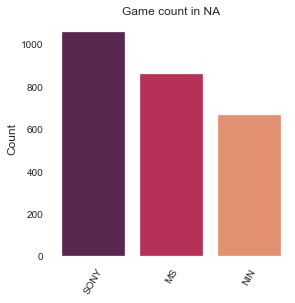

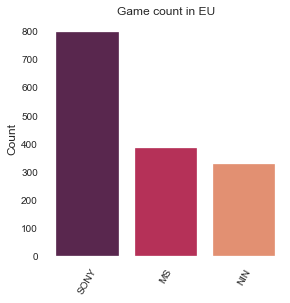

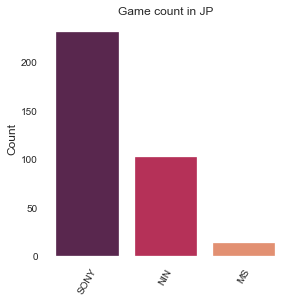

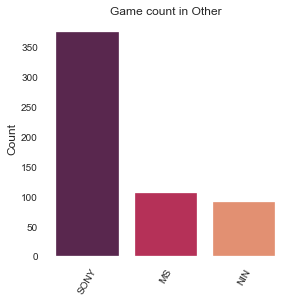

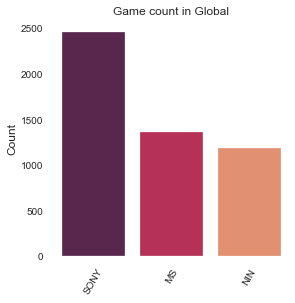

In [1048]:
regions = ['NA','EU','JP','Other', 'Global']

def plat(df, col):
    plat = df[['Manufacturer', col]].groupby(['Manufacturer']).sum().sort_values(col, ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(4, 4))
    plt.xticks(rotation=60)
    plt.tight_layout()
    sns.barplot(y=col, x='Manufacturer', data=plat, palette='rocket').set_title(('Game count in '+col), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('')
    
for col in regions:
    plat(vgcon, col)

In [1075]:
#Calculate frequency in each region  for consoles

for col in regions:
    plat = round((vgcon[['Manufacturer', col]].groupby(['Manufacturer']).sum()*100/(vgcon[col].sum())), 1)
    print(plat)
    print(" ")


                NA
Manufacturer      
MS            33.2
NIN           25.8
SONY          40.9
 
                EU
Manufacturer      
MS            25.4
NIN           21.7
SONY          52.9
 
                JP
Manufacturer      
MS             4.0
NIN           29.5
SONY          66.5
 
              Other
Manufacturer       
MS             18.4
NIN            15.9
SONY           65.7
 
              Global
Manufacturer        
MS              27.2
NIN             23.7
SONY            49.1
 


In [1076]:
#Handheld sales
for col in regions:
    plat = round((vghan[['Manufacturer', col]].groupby(['Manufacturer']).sum() * 100/(vghan[col].sum())), 1)
    print(plat)
    print(" ")

                NA
Manufacturer      
NIN_H         79.1
SONY_H        20.9
 
                EU
Manufacturer      
NIN_H         75.2
SONY_H        24.8
 
                JP
Manufacturer      
NIN_H         73.8
SONY_H        26.2
 
              Other
Manufacturer       
NIN_H          59.3
SONY_H         40.7
 
              Global
Manufacturer        
NIN_H           75.1
SONY_H          24.9
 


# Changes over time

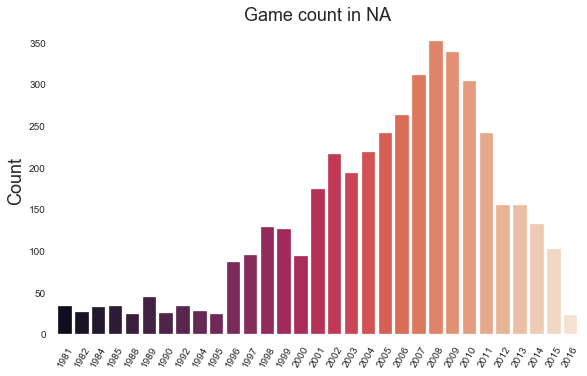

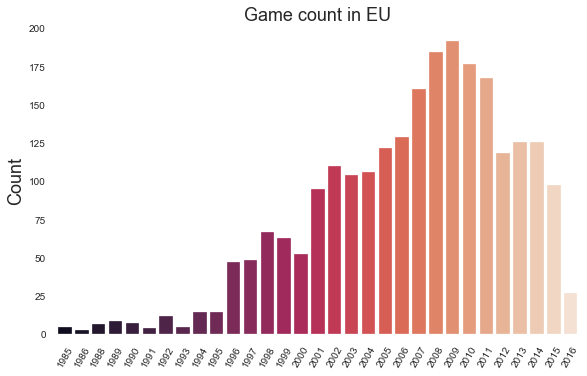

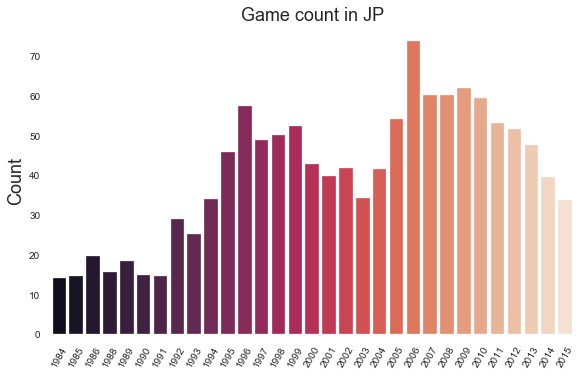

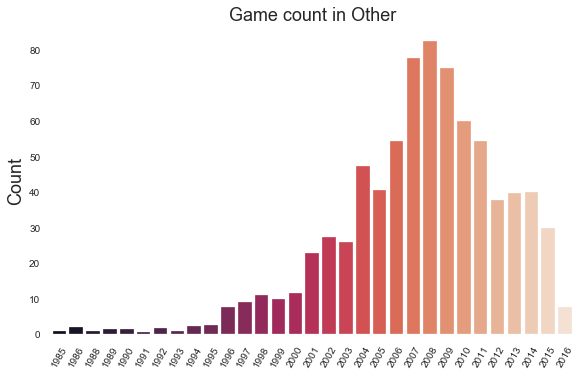

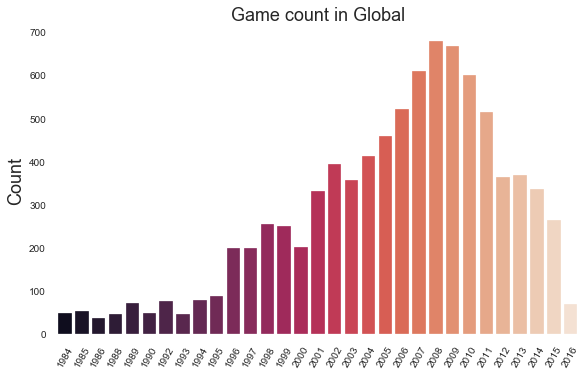

In [686]:
#Create seperate graphs for each region and sort them by genre which sells the most

regions = ['NA','EU','JP','Other', 'Global']

def region_years(df, col):
    yeargraphs = df[['Year', col]].groupby(['Year']).sum().sort_values(col, ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(8, 5))
    plt.xticks(rotation=60)
    plt.tight_layout()
    sns.barplot(y=col, x='Year', data=yeargraphs[:31], palette='rocket').set_title(('Game count in '+col), fontsize=18)
    plt.ylabel('Count', fontsize=18)
    plt.xlabel('')
    

for col in regions:
    region_years(vgsales, col)

In [650]:
#Was planning on seperating data by decades and exploring it based on that. May revist

vgyear = vgsales.copy()
vgyear['Year'] = vgyear['Year'].apply(lambda x: 1980 if x < 1990 else 
                                      (1990 if x < 2000 else 2000 if x < 2010 else 2010))

In [664]:
vgyear['Year'].unique()

array([2000, 1980, 1990, 2010])

# Summary

The top 10 Publishers in the dataset are 

1. Electronic Arts               
2. Activision                     
3. Namco Bandai Games               
4. Ubisoft                         
5. Konami Digital Entertainment    
6. THQ                             
7. Nintendo                        
8. Sony Computer Entertainment    
9. Sega                            
10. Take-Two Interactive    

The top 10 genres are
1. Action          
2. Sports          
3. Misc            
4. Role-Playing     
5. Shooter          
6. Adventure        
7. Racing           
8. Platform         
9. Simulation       
10. Fighting         

The top 10 platforms are:
1. DS 
2. PS2 
3. PS3 
4. Wii 
5. X360 
6. PSP 
7. PS 
8. PC 
9. XB 
10. GBA

Of the 4 regions (NA, EU, JP and Other), the largest market for gaming was NA

### Genre trends
In North America, the top 5 selling genres of games are Action, Sports, Shooter and Platform. In Europe, it is Action, Sports, Shooter, Racing and Misc. For Japan it is Role-Playing, Action, Sports, Platform and Misc. These differnces mark different trends in the different regions. For example FIFA does extremely well in Europe as a Sports title, but not so much elsewhere. Madden has its highest sales in North America. This makes sense since football is a predominently American sport and soccer is big in Europe. The best selling genre in Japan is Role-Playing with Pokemon being the franchise that appears the most. Not surprisingly its Publisher, Nintendo is a Japanese company.

### Year over Year Sales

There was a steady trend towards increase in annual game sales up until 2008 where this peaked. Beginning in 2010, there was a steady decline in sales reported. The most likely cause is that this corresponded to the rise in digital gaming platforms. This dataset represents physical sales so as more people began to buy games online, less physical games were sold. Interestingly Japan did not experiene as sharp a decline as the other territories, suggesting  that it took longer for the digital platforms to be a major source of game purchases

### Comparison of Platforms
The bulk of sales from 6th generation consoles games to now have come from Sony. It's greatest lead is in Japan where it makes up 66.5% of the marketshare with 65.7%, 52.9% and 40.9% in Other, Europe and North America, respectively. While Microsoft accounts for 27.2% of global console sales, it has not been successful in breaching the Japanese market. Only 4% of games sold there came from Microsoft consoles. Nintendo's best market is Japan where it makes up 29.5% of total games sold.

Nintendo dominated handheld software sales by over 70% in almost every region but other. Sony's handhelds managed to make up 40.67% of the sales in those regions vs  Nintendo's 59.33%.

### Final Thoughts
The market leader of  the past 20 years for consoles has been Sony. Areas where Microsoft could make improvements is in Japan as the other two have a substantial lead there. Nintendo's weakest regions are the ones marked Other. This is true for both handhelds and consoles

If I had time to go back to this, I would explore some of the trends pre-2000, particularly when new manufacturers entered the gaming scene. Additionally I did not focus on publishers and specific series. Availability of popular franchises on certain consoles is likely to influence sales